In [1]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import numpy as np

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
import pandas as pd

train = pd.read_csv("data/train_df_jm.csv")
test = pd.read_csv("data/test_df_jm.csv")
sub = pd.read_csv("data/sample_submission.csv")
age = pd.read_csv("data/age_gender_info.csv")
make_age = pd.read_csv("make_age_data.csv") ## 따로 만든 age 데이터 가지고 와서 넣기
train.shape, test.shape, sub.shape, age.shape

((2869, 15), (1008, 14), (150, 2), (16, 23))

In [4]:
make_age

,지역,남,여
0,경상북도,0.463584,0.536416
1,경상남도,0.466036,0.533964
2,대전광역시,0.462683,0.537317
3,경기도,0.470582,0.529418
4,전라북도,0.465432,0.534568
5,강원도,0.458546,0.541454
6,광주광역시,0.465327,0.534673
7,충청남도,0.475589,0.524411
8,부산광역시,0.455360,0.544640
9,제주특별자치도,0.460094,0.539906


In [5]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [6]:
train['단지코드'].unique()
np.unique(train['단지코드'], return_counts = True)


(array(['C1000', 'C1004', 'C1005', 'C1013', 'C1014', 'C1015', 'C1017',
        'C1022', 'C1024', 'C1026', 'C1027', 'C1032', 'C1039', 'C1045',
        'C1046', 'C1048', 'C1049', 'C1056', 'C1057', 'C1059', 'C1065',
        'C1068', 'C1077', 'C1084', 'C1085', 'C1089', 'C1102', 'C1103',
        'C1109', 'C1122', 'C1129', 'C1131', 'C1133', 'C1136', 'C1141',
        'C1143', 'C1155', 'C1156', 'C1163', 'C1171', 'C1173', 'C1175',
        'C1176', 'C1177', 'C1180', 'C1184', 'C1194', 'C1206', 'C1207',
        'C1210', 'C1213', 'C1227', 'C1234', 'C1236', 'C1244', 'C1258',
        'C1263', 'C1268', 'C1269', 'C1281', 'C1284', 'C1286', 'C1301',
        'C1307', 'C1309', 'C1310', 'C1312', 'C1316', 'C1319', 'C1320',
        'C1326', 'C1328', 'C1329', 'C1338', 'C1340', 'C1341', 'C1343',
        'C1344', 'C1350', 'C1357', 'C1360', 'C1363', 'C1365', 'C1368',
        'C1375', 'C1379', 'C1386', 'C1394', 'C1402', 'C1406', 'C1407',
        'C1410', 'C1424', 'C1426', 'C1428', 'C1430', 'C1439', 'C1448',
      

In [7]:
train.head(30)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
5,C2515,545,아파트,경상남도,국민임대,51.97,106,17.0,A,23042000,190090,0.0,3.0,624.0,205.0
6,C2515,545,아파트,경상남도,국민임대,51.97,26,17.0,A,23042000,190090,0.0,3.0,624.0,205.0
7,C1407,1216,아파트,대전광역시,국민임대,30.95,288,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0
8,C1407,1216,아파트,대전광역시,국민임대,30.99,68,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0
9,C1407,1216,아파트,대전광역시,국민임대,30.99,34,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0


In [8]:
train.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '등록차량수']

test.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수']

(array([ 12.,   6.,  85., 180., 352., 314., 649., 781., 386., 104.]),
 array([2.56494936, 3.09283929, 3.62072921, 4.14861914, 4.67650907,
        5.204399  , 5.73228893, 6.26017885, 6.78806878, 7.31595871,
        7.84384864]),
 <BarContainer object of 10 artists>)

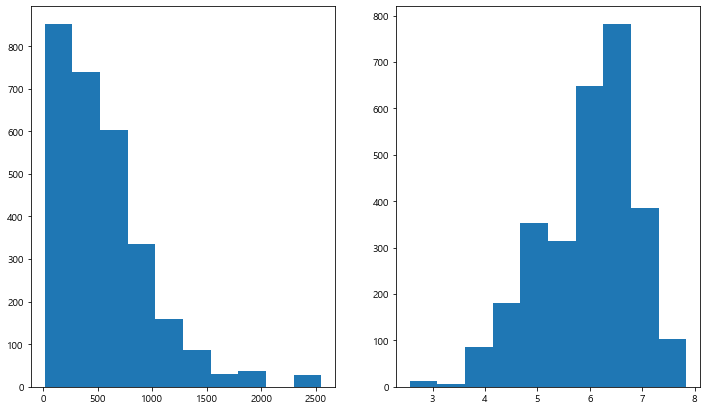

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,7))

ax1.hist(train['등록차량수'])
ax2.hist(np.log(train['등록차량수']))

In [10]:
all_df = pd.concat([train, test], join='inner', ignore_index=True) #기존 인덱스 겹쳐지지 않게 만들어준다
all_df
all_df.shape

(3877, 14)

In [11]:
# all_df = pd.merge(all_df, make_age)

In [12]:
all_df.shape

(3877, 14)

## 결측치 처리

### 자격유형

In [13]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            2
임대보증금         749
임대료           749
10분내지하철수      245
10분내버스정류장수      0
단지내주차면수         0
dtype: int64

In [14]:
all_df.loc[all_df['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
3065,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
3127,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0


In [15]:
grouped = all_df.groupby(['단지코드', '임대건물구분', '지역','공급유형'])
group1 = grouped.get_group( ('C2411', '아파트', '경상남도', '국민임대')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
3062,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000,100720,0.0,2.0,840.0
3063,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000,100720,0.0,2.0,840.0
3064,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000,100720,0.0,2.0,840.0
3065,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
3066,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000,171480,0.0,2.0,840.0


In [16]:
group2 = grouped.get_group( ('C2253', '아파트', '강원도', '영구임대')  )
group2

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
3127,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0
3128,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000,83020,0.0,2.0,173.0
3129,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000,83020,0.0,2.0,173.0


In [17]:
all_df.loc[ 3065, "자격유형"] = 'A'
all_df.loc[ 3127, "자격유형"] = 'C'

In [18]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         749
임대료           749
10분내지하철수      245
10분내버스정류장수      0
단지내주차면수         0
dtype: int64

### 임대보증금

In [19]:
print(all_df[all_df['임대보증금']=='-'].shape)
# - 값 0으로 바꾸기
all_df.loc[all_df['임대보증금']=='-','임대보증금'] = 0
print('변경후')
print(all_df[all_df['임대보증금']=='-'].shape)

(18, 14)
변경후
(0, 14)


In [20]:
#일단 Nan 0으로 처리
print(all_df['임대보증금'].isnull().sum())
all_df['임대보증금'] = all_df['임대보증금'].fillna(0)
print('변경후')
print(all_df['임대보증금'].isnull().sum())

749
변경후
0


### 임대료

In [21]:
print(all_df[all_df['임대료']=='-'].shape)
# - 값 0으로 바꾸기
all_df.loc[all_df['임대료']=='-','임대료'] = 0
print('변경후')
print(all_df[all_df['임대료']=='-'].shape)

(21, 14)
변경후
(0, 14)


In [22]:
#일단 Nan 0으로 처리
print(all_df['임대료'].isnull().sum())
all_df['임대료'] = all_df['임대료'].fillna(0)
print('변경후')
print(all_df['임대료'].isnull().sum())

749
변경후
0


In [23]:
all_df['임대료'] = all_df['임대료'].astype(int)
all_df['임대보증금'] = all_df['임대보증금'].astype(int)

In [24]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        3877 non-null   object 
 1   총세대수        3877 non-null   int64  
 2   임대건물구분      3877 non-null   object 
 3   지역          3877 non-null   object 
 4   공급유형        3877 non-null   object 
 5   전용면적        3877 non-null   float64
 6   전용면적별세대수    3877 non-null   int64  
 7   공가수         3877 non-null   float64
 8   자격유형        3877 non-null   object 
 9   임대보증금       3877 non-null   int32  
 10  임대료         3877 non-null   int32  
 11  10분내지하철수    3632 non-null   float64
 12  10분내버스정류장수  3877 non-null   float64
 13  단지내주차면수     3877 non-null   float64
dtypes: float64(5), int32(2), int64(2), object(5)
memory usage: 393.9+ KB


### 10분내 지하철 수

In [25]:
#일단 Nan 0으로 처리
print(all_df['10분내지하철수'].isnull().sum())
all_df['10분내지하철수'] = all_df['10분내지하철수'].fillna(0)
print('변경후')
print(all_df['10분내지하철수'].isnull().sum())

245
변경후
0


In [26]:
all_df.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0


In [27]:
all_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
dtype: int64

In [28]:
all_df.corr()['10분내버스정류장수']

총세대수         -0.001356
전용면적          0.002800
전용면적별세대수      0.040957
공가수           0.038177
임대보증금         0.124743
임대료           0.084311
10분내지하철수      0.057391
10분내버스정류장수    1.000000
단지내주차면수       0.102414
Name: 10분내버스정류장수, dtype: float64

In [29]:
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2772,C2225,1206,아파트,경상남도,행복주택,26.17,120,49.0,K,51961000,27060,0.0,3.0,842.0,448.0
2773,C2225,1206,아파트,경상남도,행복주택,26.19,16,49.0,K,51961000,27060,0.0,3.0,842.0,448.0
2774,C2225,1206,아파트,경상남도,행복주택,36.03,290,49.0,K,72294000,37650,0.0,3.0,842.0,448.0
2775,C2225,1206,아파트,경상남도,행복주택,36.03,60,49.0,K,72294000,37650,0.0,3.0,842.0,448.0


In [30]:
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
val = group1['10분내버스정류장수'].mean()
val

4.011278195488722

In [31]:
# 데이터 확인 후, 처리
all_df.loc[ all_df['10분내버스정류장수'].isnull(), "10분내버스정류장수"] = val

In [32]:
all_df.loc[ all_df['10분내버스정류장수'].isnull(), :]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수


In [33]:
all_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
dtype: int64

In [34]:
mapping = { 'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 
            'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 
            'K':11, 'L':12, 'M':13, 'N':14, 'O':15  }

all_df['자격유형'] =all_df['자격유형'].map(mapping).astype(int)

In [35]:
all_df.shape

(3877, 14)

In [36]:
all_df.head(100)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,82940,0.0,3.0,624.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,107130,0.0,3.0,624.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,107130,0.0,3.0,624.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,149760,0.0,3.0,624.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,149760,0.0,3.0,624.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,4,0,0,0.0,2.0,97.0
96,C1874,619,상가,충청남도,임대상가,22.89,1,2.0,4,0,0,0.0,2.0,97.0
97,C1874,619,상가,충청남도,임대상가,23.13,1,2.0,4,0,0,0.0,2.0,97.0
98,C1874,619,상가,충청남도,임대상가,23.13,1,2.0,4,0,0,0.0,2.0,97.0


In [37]:
gubun1 = {'아파트':1, '상가':2}
gubun2 = {'경상남도':1, '대전광역시':2, '경기도':3, '전라북도':4, 
          '강원도':5, '광주광역시':6, '충청남도':7, '부산광역시':8, 
          '제주특별자치도':9, '울산광역시':10, '충청북도':11, '전라남도':12, 
          '경상북도':13, '대구광역시':14, '서울특별시':15, '세종특별자치시':16}

gubun3 = {'국민임대':1, '공공임대(50년)':2, '영구임대':3, '임대상가':4, 
          '공공임대(10년)':5, '공공임대(분납)':6, '장기전세':7, '공공분양':8, 
          '행복주택':9, '공공임대(5년)':10}

all_df['임대건물구분_lbl'] = all_df['임대건물구분'].map(gubun1)
all_df['지역_lbl'] = all_df['지역'].map(gubun2)
all_df['공급유형_lbl'] = all_df['공급유형'].map(gubun3)

all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,82940,0.0,3.0,624.0,1,1,1
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,12,0,0,0.0,1.0,467.0,1,1,9
3873,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,8,6872000,106400,0.0,2.0,300.0,1,4,1
3874,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,8,6872000,106400,0.0,2.0,300.0,1,4,1
3875,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,8,13410000,144600,0.0,2.0,300.0,1,4,1


In [38]:
all_df['단지코드'] = all_df['단지코드'].astype("category")
all_df['단지코드_lbl'] = all_df['단지코드'].cat.codes # category가 code로 변환된다.

### 전용면적을 구간화하기
all_df['전용면적별세대수'] = all_df['전용면적별세대수'].astype('float32')

# 전용면적, 공가수, 단지내주차면수
all_df['qcut_총세대수'] = pd.qcut(all_df['총세대수'], 5, labels=False) # 구간을 나눠서 보겠다. (총 세대수에 대해서 구간 분할 해 주기)
all_df.head(10)
all_df['qcut_총세대수'].unique()

array([1, 3, 2, 4, 0], dtype=int64)

# 전용면적별 세대의 합계와 총세대수가 일치하지 않는 오류
* 차이가 14세대 이하인 48개 단지 - ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 'C1584', 'C2298', 'C2225', 'C1218', 'C1970', C1732', 'C2433', 'C1894', 'C1156', 'C2142', 'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189']
* 차이가 94~452세대인 10개 단지(크기순) - ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804’]

#### 차이가 14세대 이하인 48개 단지 : 단지코드_Type =1

In [39]:
group1 = ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', 
          'C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 
          'C1584', 'C2298', 'C2225', 'C1218', 'C1970', 'C1732', 'C2433', 'C1894', 'C1156', 'C2142', 
          'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', 
          'C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189' ]

for one1 in group1:
    all_df.loc[ all_df['단지코드'] == one1, "단지코드_Type" ] = 1

In [40]:
all_df['단지코드_Type'].unique()

array([nan,  1.])

#### 차이가 94~452세대인 10개단지 처리하기 :  단지코드_Type =2

In [41]:
group2 = ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804']
for one2 in group2:
        all_df.loc[all_df['단지코드'] == one2, "단지코드_Type"] = 2

#### 그외 :  단지코드_Type =3

In [42]:
all_df.loc[  all_df['단지코드_Type'].isna(), "단지코드_Type"] = 3
all_df['단지코드_Type'].unique()

array([3., 1., 2.])

### 변수 추가

In [43]:
all_df['환산보증금'] = all_df['임대보증금'].astype(int)+(all_df['임대료'].astype(int)+100)
all_df['환산보증금']

0        9299040
1       12779230
2       12779230
3       18582860
4       18582860
          ...   
3872         100
3873     6978500
3874     6978500
3875    13554700
3876    18855600
Name: 환산보증금, Length: 3877, dtype: int32

(array([  3.,  12.,  26.,  31., 265., 468., 831., 937., 886., 418.]),
 array([2.63905733, 3.12465022, 3.61024311, 4.095836  , 4.58142889,
        5.06702178, 5.55261467, 6.03820756, 6.52380045, 7.00939334,
        7.49498623]),
 <BarContainer object of 10 artists>)

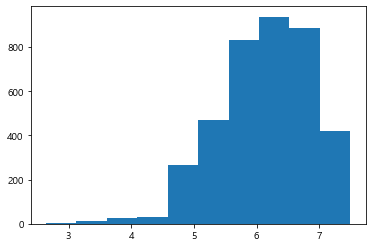

In [44]:
all_df['log_단지내주차면수'] = np.log1p(all_df['단지내주차면수'])
plt.hist(all_df['log_단지내주차면수'])

(array([   6.,    0.,   36.,   16.,  118.,  426.,  977., 1204.,  766.,
         328.]),
 array([3.29583687, 3.75153596, 4.20723506, 4.66293415, 5.11863324,
        5.57433234, 6.03003143, 6.48573053, 6.94142962, 7.39712872,
        7.85282781]),
 <BarContainer object of 10 artists>)

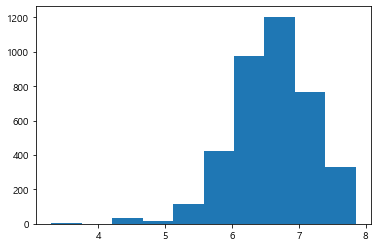

In [45]:
all_df['log_총세대수'] = np.log1p(all_df['총세대수'])
plt.hist(all_df['log_총세대수'])

(array([750.,  65., 165., 358., 615., 789., 703., 348.,  77.,   7.]),
 array([0.6931472, 1.3769877, 2.0608282, 2.7446687, 3.4285092, 4.1123495,
        4.7961903, 5.480031 , 6.1638713, 6.8477116, 7.5315523],
       dtype=float32),
 <BarContainer object of 10 artists>)

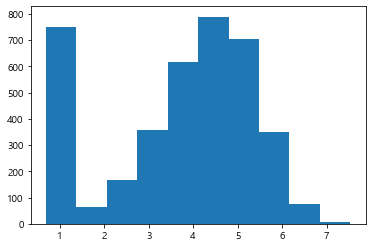

In [46]:
all_df['log_전용면적별세대수'] = np.log1p(all_df['전용면적별세대수'])
plt.hist(all_df['log_전용면적별세대수'])

(array([172., 260., 329., 272., 176., 579., 609., 774., 585., 121.]),
 array([0.        , 0.40253517, 0.80507034, 1.20760551, 1.61014068,
        2.01267585, 2.41521101, 2.81774618, 3.22028135, 3.62281652,
        4.02535169]),
 <BarContainer object of 10 artists>)

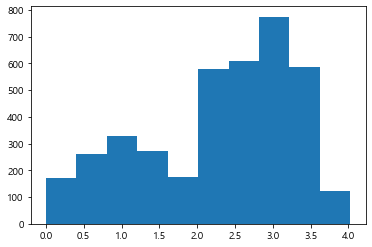

In [47]:
all_df['log_공가수'] = np.log1p(all_df['공가수'])
plt.hist(all_df['log_공가수'])

In [48]:
all_df_last = all_df.drop(['임대건물구분', '지역', '공급유형'] , axis=1)
all_df_last

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,지역_lbl,공급유형_lbl,단지코드_lbl,qcut_총세대수,단지코드_Type,환산보증금,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,1,1,492,1,3.0,9299040,6.437752,6.302619,5.624018,2.890372
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,1,1,492,1,3.0,12779230,6.437752,6.302619,4.110874,2.890372
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,1,1,492,1,3.0,12779230,6.437752,6.302619,3.044523,2.890372
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,1,1,492,1,3.0,18582860,6.437752,6.302619,3.663562,2.890372
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,1,1,492,1,3.0,18582860,6.437752,6.302619,2.995732,2.890372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,C1267,675,36.77,126.0,38.0,12,0,0,0.0,1.0,...,1,9,86,2,1.0,100,6.148468,6.516193,4.844187,3.663562
3873,C2189,382,29.19,96.0,45.0,8,6872000,106400,0.0,2.0,...,4,1,381,0,1.0,6978500,5.707110,5.948035,4.574711,3.828641
3874,C2189,382,29.19,20.0,45.0,8,6872000,106400,0.0,2.0,...,4,1,381,0,1.0,6978500,5.707110,5.948035,3.044523,3.828641
3875,C2189,382,39.45,202.0,45.0,8,13410000,144600,0.0,2.0,...,4,1,381,0,1.0,13554700,5.707110,5.948035,5.313206,3.828641


In [49]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   단지코드          3877 non-null   category
 1   총세대수          3877 non-null   int64   
 2   임대건물구분        3877 non-null   object  
 3   지역            3877 non-null   object  
 4   공급유형          3877 non-null   object  
 5   전용면적          3877 non-null   float64 
 6   전용면적별세대수      3877 non-null   float32 
 7   공가수           3877 non-null   float64 
 8   자격유형          3877 non-null   int32   
 9   임대보증금         3877 non-null   int32   
 10  임대료           3877 non-null   int32   
 11  10분내지하철수      3877 non-null   float64 
 12  10분내버스정류장수    3877 non-null   float64 
 13  단지내주차면수       3877 non-null   float64 
 14  임대건물구분_lbl    3877 non-null   int64   
 15  지역_lbl        3877 non-null   int64   
 16  공급유형_lbl      3877 non-null   int64   
 17  단지코드_lbl      3877 non-null   int16   
 18  qcut_총세대

In [50]:
# '총세대수' : 0.333440, '단지내주차면수' : 0.861338, 임대건물구분_lbl : -0.449130
# 전용면적    0.112717, 전용면적별세대수   0.250513, 공가수           0.118910,
# 자격유형         -0.154034, 공급유형_lbl     -0.137277

In [51]:
train.corr()['등록차량수']

총세대수          0.326923
전용면적          0.106366
전용면적별세대수      0.254948
공가수           0.130775
10분내지하철수     -0.101792
10분내버스정류장수    0.110977
단지내주차면수       0.856549
등록차량수         1.000000
Name: 등록차량수, dtype: float64

(array([3.245e+03, 4.700e+02, 1.060e+02, 4.500e+01, 4.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 1.8740e+02, 3.7380e+02, 5.6020e+02, 7.4660e+02,
        9.3300e+02, 1.1194e+03, 1.3058e+03, 1.4922e+03, 1.6786e+03,
        1.8650e+03], dtype=float32),
 <BarContainer object of 10 artists>)

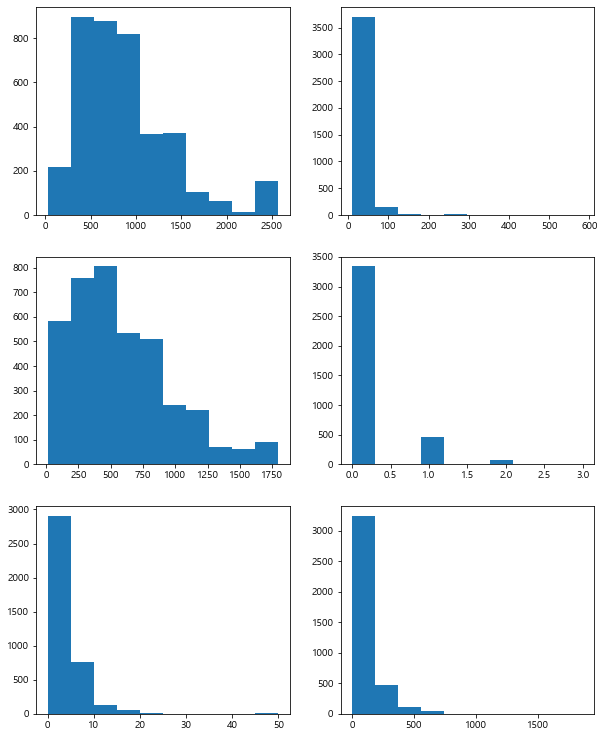

In [52]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,13))

ax[0][0].hist(all_df_last['총세대수'])
ax[0][1].hist(all_df_last['전용면적'])
ax[1][0].hist(all_df_last['단지내주차면수'])
ax[1][1].hist(all_df_last['10분내지하철수'])
ax[2][0].hist(all_df_last['10분내버스정류장수'])
ax[2][1].hist(all_df_last['전용면적별세대수'])

In [53]:
train_df = all_df_last.iloc[0:2869,:]
test_df = all_df_last.iloc[2869:,:]

train_df.shape, test_df.shape

train_df = pd.concat([train_df, train['등록차량수'] ], axis=1)
train_df

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,공급유형_lbl,단지코드_lbl,qcut_총세대수,단지코드_Type,환산보증금,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,1,492,1,3.0,9299040,6.437752,6.302619,5.624018,2.890372,205.0
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,1,492,1,3.0,12779230,6.437752,6.302619,4.110874,2.890372,205.0
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,1,492,1,3.0,12779230,6.437752,6.302619,3.044523,2.890372,205.0
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,1,492,1,3.0,18582860,6.437752,6.302619,3.663562,2.890372,205.0
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,1,492,1,3.0,18582860,6.437752,6.302619,2.995732,2.890372,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2532,239,49.20,19.0,7.0,1,11346000,116090,0.0,1.0,...,1,501,0,3.0,11462190,5.117994,5.480639,2.995732,2.079442,146.0
2865,C2532,239,51.08,34.0,7.0,1,14005000,142310,0.0,1.0,...,1,501,0,3.0,14147410,5.117994,5.480639,3.555348,2.079442,146.0
2866,C2532,239,51.73,34.0,7.0,1,14005000,142310,0.0,1.0,...,1,501,0,3.0,14147410,5.117994,5.480639,3.555348,2.079442,146.0
2867,C2532,239,51.96,114.0,7.0,1,14005000,142310,0.0,1.0,...,1,501,0,3.0,14147410,5.117994,5.480639,4.744932,2.079442,146.0


In [54]:
train_df['log_등록차량수'] = np.log1p(train_df['등록차량수'])

In [55]:
from sklearn.model_selection import train_test_split

print("등록차량수 상관계수 : ", train_df.corr()['등록차량수'])
print()
print("log_등록차량수 상관계수 ; ", train_df.corr()['log_등록차량수'])

등록차량수 상관계수 :  총세대수            0.326923
전용면적            0.106366
전용면적별세대수        0.254948
공가수             0.130775
자격유형           -0.145695
임대보증금           0.412956
임대료             0.530381
10분내지하철수       -0.079587
10분내버스정류장수      0.110977
단지내주차면수         0.856549
임대건물구분_lbl     -0.449235
지역_lbl          0.044321
공급유형_lbl       -0.158484
단지코드_lbl       -0.097279
qcut_총세대수       0.391915
단지코드_Type       0.106931
환산보증금           0.414723
log_단지내주차면수     0.780551
log_총세대수        0.391253
log_전용면적별세대수    0.441152
log_공가수         0.194988
등록차량수           1.000000
log_등록차량수       0.880118
Name: 등록차량수, dtype: float64

log_등록차량수 상관계수 ;  총세대수            0.222139
전용면적            0.106791
전용면적별세대수        0.277025
공가수             0.209018
자격유형           -0.233354
임대보증금           0.457816
임대료             0.558854
10분내지하철수       -0.084091
10분내버스정류장수      0.084163
단지내주차면수         0.801934
임대건물구분_lbl     -0.596408
지역_lbl          0.100230
공급유형_lbl       -0.307760
단지코드_lbl       -0.090775
qcut_총세대수     

In [56]:
pd.set_option('display.min_rows',30)

In [57]:
train_df.head(30)

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,단지코드_lbl,qcut_총세대수,단지코드_Type,환산보증금,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수,log_등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,492,1,3.0,9299040,6.437752,6.302619,5.624018,2.890372,205.0,5.327876
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,492,1,3.0,12779230,6.437752,6.302619,4.110874,2.890372,205.0,5.327876
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,492,1,3.0,12779230,6.437752,6.302619,3.044523,2.890372,205.0,5.327876
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,492,1,3.0,18582860,6.437752,6.302619,3.663562,2.890372,205.0,5.327876
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,492,1,3.0,18582860,6.437752,6.302619,2.995732,2.890372,205.0,5.327876
5,C2515,545,51.97,106.0,17.0,1,23042000,190090,0.0,3.0,...,492,1,3.0,23232190,6.437752,6.302619,4.672829,2.890372,205.0,5.327876
6,C2515,545,51.97,26.0,17.0,1,23042000,190090,0.0,3.0,...,492,1,3.0,23232190,6.437752,6.302619,3.295837,2.890372,205.0,5.327876
7,C1407,1216,30.95,288.0,13.0,1,15620000,127350,1.0,1.0,...,131,3,3.0,15747450,7.159292,7.104144,5.666427,2.639057,1064.0,6.970730
8,C1407,1216,30.99,68.0,13.0,1,15620000,127350,1.0,1.0,...,131,3,3.0,15747450,7.159292,7.104144,4.234107,2.639057,1064.0,6.970730
9,C1407,1216,30.99,34.0,13.0,1,15620000,127350,1.0,1.0,...,131,3,3.0,15747450,7.159292,7.104144,3.555348,2.639057,1064.0,6.970730


In [58]:
train_df.isnull().sum()

단지코드            0
총세대수            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금           0
임대료             0
10분내지하철수        0
10분내버스정류장수      0
단지내주차면수         0
임대건물구분_lbl      0
지역_lbl          0
공급유형_lbl        0
단지코드_lbl        0
qcut_총세대수       0
단지코드_Type       0
환산보증금           0
log_단지내주차면수     0
log_총세대수        0
log_전용면적별세대수    0
log_공가수         0
등록차량수           0
log_등록차량수       0
dtype: int64

In [59]:
sel = [ 'log_총세대수', '전용면적', '공가수', 'log_단지내주차면수', 
       'qcut_총세대수', '자격유형', 'log_전용면적별세대수', '10분내버스정류장수',
       '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl', 
       '단지코드_Type']

lable_name = 'log_등록차량수'
X = train_df[sel]
y = train_df[lable_name]
test_X = test_df[sel]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, 
                                                    random_state=0)

In [60]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #교차검증
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#import xgboost as xgb
#import lightgbm as lgb

In [61]:
# model = RandomForestRegressor(n_jobs=-1)
# model.fit(X_train, y_train)
# pred = model.predict(X_test)

# print("학습(score) :", model.score(X_train, y_train) ) # 결정계수
# print("테스트(score) :", model.score(X_test, y_test) ) # 결정계수

In [62]:
# model = GradientBoostingRegressor()
# model.fit(X_train, y_train)
# pred = model.predict(X_test)

# print("학습(score) :", model.score(X_train, y_train) ) # 결정계수
# print("테스트(score) :", model.score(X_test, y_test) ) # 결정계수

In [63]:
# # 교차 검증으로 확인
# import time
# now_time = time.time()

# model_RF = RandomForestRegressor(n_estimators = 1000, 
#                                  random_state=0, n_jobs=-1)
# model_RF.fit(X_train, y_train)
# score = cross_val_score(model_RF, X_train, y_train, 
#                         cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error, 검증 5번 함 MAE 값으로 뽑음
# m_score = np.abs(score.mean())
# print("RandomForestRegressor Score : {}".format(m_score))  # 점수

# pro_time = time.time() - now_time
# print(pro_time)  # 걸린 시간

In [64]:
# # 교차 검증으로 확인
# import time
# now_time = time.time()

# model_RF = RandomForestRegressor(n_estimators = 1000, 
#                                  random_state=0, n_jobs=-1)
# model_RF.fit(X_train, y_train)
# score = cross_val_score(model_RF, X_train, y_train, 
#                         cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error, 검증 5번 함 MAE 값으로 뽑음
# m_score = (score.mean())
# print("RandomForestRegressor Score : {}".format(m_score))  # 점수

# pro_time = time.time() - now_time
# print(pro_time)  # 걸린 시간

## GradientBoosting 모델

In [65]:
# now_time = time.time()
# m_gb = GradientBoostingRegressor(n_estimators = 2000,
#                                  random_state=0)
# m_gb.fit(X_train, y_train)
# score = cross_val_score(m_gb, X_train, y_train,
#                         cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error
# m_score = np.abs(score.mean())
# print("RandomForestRegressor Score : {}".format(m_score))  # 점수
# pro_time = time.time() - now_time
# print(pro_time)  # 걸린 시간

#### 맨처음
* RandomForestRegressor Score : 0.04023314753482787
* 73.56202816963196

#### 변수추가 , n_estimators = 2000
* RandomForestRegressor Score : 0.0349602038660234
* 166.57256889343262

## Randomforest 모델

In [66]:
# m_rf = RandomForestRegressor(n_estimators = 2000,
#                                  random_state=0, n_jobs=-1)
# m_rf.fit(X, y)
# score = cross_val_score(m_rf, X, y,
#                         cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error
# m_score = np.abs(score.mean())
# print("RandomForestRegressor Score : {}".format(m_score))  # 점수
# pro_time = time.time() - now_time
# print(pro_time)  # 걸린 시간

#### 맨처음
* RandomForestRegressor Score : 0.04023314753482787
* 73.56202816963196

#### 변수추가 , n_estimators = 2000
* RandomForestRegressor Score : 0.3236266790461696
* 339.8584678173065


## lgbm 모델

In [67]:
#기본
hyperparameters = {'boosting_type': 'gbdt', 
                   'colsample_bytree': 0.7250136792694301, 
                   'is_unbalance': False, 
                   'learning_rate': 0.05,
                   'min_child_samples': 20, 
                   'num_leaves': 56,
                   'subsample': 0.5233384321711397, 
                   'n_estimators': 2000}

In [68]:
import lightgbm as lgb 
import time
ow_time = time.time()
now_time = time.time()

m_lgbm1 = lgb.LGBMRegressor(**hyperparameters)
m_lgbm1.fit(X_train, y_train)
score = cross_val_score(m_lgbm1, X_train, y_train, 
                        cv=5, scoring="neg_mean_absolute_error")

m_score = np.abs(score.mean())  # 절대값
pro_time = time.time() - now_time

print(pro_time)  # 걸린 시간
print("LightGBM Score : {}".format(m_score))  # 점수

117.4194061756134
LightGBM Score : 0.030599322622307225


##### 기본
* 873.3915276527405
* LightGBM Score : 0.04459292096438179

##### 모델 변경 후
* 206.89227724075317
* LightGBM Score : 0.04459292096438179 => 제출하니깐 108.37885

##### hyperparameters : learning_rate를 0.013-> 0.05로 변경
* 4795.224135637283
* LightGBM Score : 0.03199481828403217

##### hyperparameters : n_estimators를  1000-> 2000로 변경
* 237.71166443824768
* LightGBM Score : 0.030781955694238812

##### 변수 추가 : 임대보증금, 임대료
'총세대수', '전용면적', '공가수', '단지내주차면수','임대보증금', '임대료',
       'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
       '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl', 
       '단지코드_Type'
* 0.035 어쩌고 였던듯...

##### 변수 추가 : 환산보증금
'총세대수', '전용면적', '공가수', '단지내주차면수','환산보증금',
       'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
       '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl', 
       '단지코드_Type'
       
* 1090.4661061763763
* LightGBM Score : 0.03704474568887008

##### 변수 변경: 단지내주차면수 => log_단지내주차면수,'환산보증금'
'총세대수', '전용면적', '공가수', 'log_단지내주차면수','환산보증금',
       'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
       '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl', 
       '단지코드_Type'
       
* 412.050110578537
* LightGBM Score : 0.037043681164248346

##### 변수 변경 : log_단지내주차면수 만 넣기
* 117.3158769607544
* LightGBM Score : 0.030782037491727067


#### 현재 : 
* 266.30909061431885
* LightGBM Score : 0.26964048945238644


#### 남,여 :
* 250.72591161727905
* LightGBM Score : 0.2647430560827295

#### merge 빼고 보기:

#### 준명님 파일로 다시 만들기 :
* 124.2114953994751
* LightGBM Score : 0.030607977963567946    > 104.06712점

#### log총세대수 , log 전용 면적별 세대수 n_estimators = 2000(last 모델에) :
* 109.57811450958252
* LightGBM Score : 0.030599322622307225 > 103.57818 점

#### log_공가수n_estimators = 2000(last 모델에)
* 17.4194061756134
* LightGBM Score : 0.030599322622307225 > 103.7714365124점

# 최종모델 만들기

In [69]:
model_last = lgb.LGBMRegressor(n_estimators = 2000,
                                 random_state=0, n_jobs=-1)
model_last.fit(X_train, y_train)
pred = model_last.predict(test_X)
pred[0:10]

array([6.49346525, 6.46054596, 6.48438541, 6.4748963 , 6.45631791,
       6.45404479, 6.44611906, 6.44726815, 7.1277944 , 7.09899123])

In [70]:
test_df['등록차량수'] = np.expm1(pred)
test_df['단지별차량수평균'] = test_df.groupby("단지코드")['등록차량수'].transform(np.mean)
test_new = test_df.drop_duplicates(['단지코드'], keep='first').reset_index()
test_new

<ipython-input-70-4240d87ed58b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['등록차량수'] = np.expm1(pred)
<ipython-input-70-4240d87ed58b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['단지별차량수평균'] = test_df.groupby("단지코드")['등록차량수'].transform(np.mean)


,index,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,...,단지코드_lbl,qcut_총세대수,단지코드_Type,환산보증금,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수,단지별차량수평균
0,2869,C1072,754,39.79,116.0,14.0,8,22830000,189840,0.0,...,32,2,3.0,23019940,6.527958,6.626718,4.762174,2.708050,659.809273,641.114297
1,2877,C1128,1354,39.79,368.0,9.0,8,22830000,189840,0.0,...,43,4,3.0,23019940,7.104144,7.211557,5.910797,2.302585,1245.125482,1209.448109
2,2886,C1456,619,33.40,82.0,18.0,1,19706000,156200,0.0,...,143,1,3.0,19862300,6.306275,6.429719,4.418840,2.944439,571.036327,582.237673
3,2895,C1840,593,39.57,253.0,7.0,1,14418000,108130,0.0,...,263,1,3.0,14526230,6.298949,6.386879,5.537334,2.079442,558.715514,580.589363
4,2899,C1332,1297,39.99,282.0,11.0,8,28598000,203050,0.0,...,110,4,3.0,28801150,7.014814,7.168580,5.645447,2.484907,1207.718554,1194.189973
5,2907,C1563,1974,39.73,214.0,15.0,1,30040000,206380,0.0,...,165,4,3.0,30246480,7.436617,7.588324,5.370638,2.772589,1626.618075,1630.406785
6,2918,C1794,1349,29.91,245.0,25.0,1,10273000,92330,0.0,...,249,4,3.0,10365430,7.002156,7.207860,5.505332,3.258097,993.197061,990.819640
7,2924,C1640,533,39.51,87.0,17.0,1,15620000,114140,0.0,...,192,1,3.0,15734240,6.154858,6.280396,4.477337,2.890372,349.256793,374.981636
8,2928,C1377,470,29.91,62.0,18.0,1,8394000,71950,0.0,...,124,1,3.0,8466050,5.953243,6.154858,4.143135,2.944439,369.792772,328.332833
9,2933,C2072,353,33.61,116.0,6.0,1,8050000,68110,0.0,...,341,0,3.0,8118210,5.638355,5.869297,4.762174,1.945910,293.101046,285.655876


In [71]:
add_dat = {'code':['C2675', 'C2335', 'C1327'],
           'num':['0', '0', '0']}
add_df = pd.DataFrame(add_dat)

In [72]:
sub_df = test_new[ ['단지코드', '단지별차량수평균']]
sub_df.columns = ['code', 'num']
sub_df = pd.concat([sub_df, add_df]).reset_index()
sub_df = sub_df.drop(['index'], axis=1)
sub_df

,code,num
0,C1072,641.114
1,C1128,1209.45
2,C1456,582.238
3,C1840,580.589
4,C1332,1194.19
5,C1563,1630.41
6,C1794,990.82
7,C1640,374.982
8,C1377,328.333
9,C2072,285.656


In [73]:
sub_df.to_csv('11th_lgbm_0721.csv', index=False)
sub_df.head()

,code,num
0,C1072,641.114
1,C1128,1209.45
2,C1456,582.238
3,C1840,580.589
4,C1332,1194.19
